In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/ankurroy/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


## We have undertaken this project to analyze and characterize United Healthcare (NYSE:UNH) stock performance. 

We have obtained our dataset from Kaggle (source: *https://www.kaggle.com/datasets/kalilurrahman/united-healthcare-stock-data*)

In [2]:
file_name='UnitedHealthCare_stock_history.csv'
file_data=pd.read_csv(file_name)

## Reading the file contents and defining parameters



In [3]:
file_data['Open']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
9401    498.649994
9402    481.750000
9403    484.910004
9404    481.350006
9405    497.000000
Name: Open, Length: 9406, dtype: float64

In [4]:
#the opening prices of stocks per day and closing prices are determined to calculate the net value earned/lost in a day fo trading

opening_price=file_data['Open']
closing_price=file_data['Close']
volume=file_data['Volume']

net_worth_pd=volume*(closing_price-opening_price)  #the net income at the end of each day of trading
date=file_data['Date']
date=np.array(date)
date_yr=[x.rsplit('-') for x in date]
year=[int(date_yr[i][0]) for i in range(len(date_yr))]
month=[int(date_yr[i][1]) for i in range(len(date_yr))]
day=[int(date_yr[i][2]) for i in range(len(date_yr))]
year=np.array(year)



####   We have deliberately excluded data from years 1984-1991, as the opening prices remained at 0 throughout this timperiod. Since we have accepted {closing price - opening price} as a valid indicator of annual profits, including this data would have generated misleading charts. 

In [5]:
   
def worth_quarter(low_range,high_range,label):
    index_loc=np.where((year >= low_range) & (year <=high_range))[0]
    First_quarter=[]
    Second_quarter=[]
    Third_quarter=[]
    Fourth_quarter=[]
    for i in np.unique(year[index_loc]):
        j=np.where(year==i)[0]
        net_worth_1=[]
        net_worth_2=[]
        net_worth_3=[]
        net_worth_4=[]
        for k in j:
            if 1<=month[k]<=3: 
                net_worth_1.append(net_worth_pd[k])
            elif 4<=month[k]<=6:
                net_worth_2.append(net_worth_pd[k])
            elif 7<=month[k]<=9:
                net_worth_3.append(net_worth_pd[k])
            elif 10<=month[k]<=12:
                net_worth_4.append(net_worth_pd[k]) 
                
        for lst in (net_worth_1,net_worth_2,net_worth_3,net_worth_4):
            if lst==[]:
                lst.append(0.0)
            else:
                pass
        First_quarter.append(np.mean(net_worth_1)/1e7)
        Second_quarter.append(np.mean(net_worth_2)/1e7)
        Third_quarter.append(np.mean(net_worth_3)/1e7)
        Fourth_quarter.append(np.mean(net_worth_4)/1e7)
       
        
    bar_plot = pd.DataFrame({'Q1': First_quarter,
                          'Q2': Second_quarter,
                            'Q3': Third_quarter,
                            'Q4': Fourth_quarter},
                           index=np.unique(year[index_loc]).tolist())
    bar_plot.plot(kind = 'bar', stacked = True, color = ['Blue', 'yellow', 'green','Orange'])
    plt.ylabel('Mean income of United Healthcare stock (\$ $\mathregular{10^{7}}$)')
    plt.xlabel('Year ')
    plt.title(label)
    plt.xticks(rotation=0, ha='right')

    plt.show()
    

    
    

## UNH stock performance over the decades

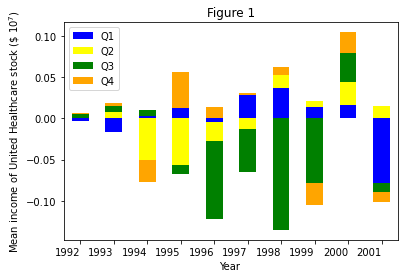

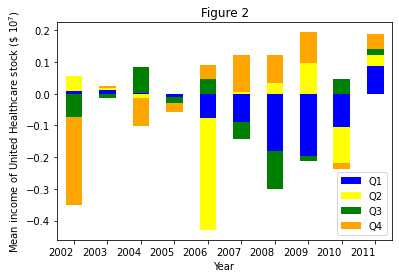

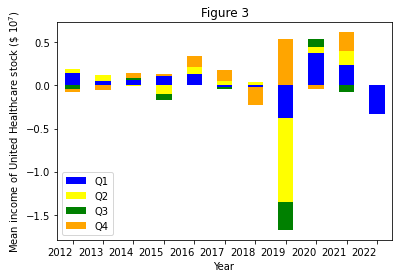

(None, None, None)

In [6]:
worth_quarter(1992,2001,'Figure 1'),worth_quarter(2002,2011,'Figure 2'),worth_quarter(2012,2022,'Figure 3')


### The stacked bar plots represent the annual performances (of UH stocks), across four quarters, for three decades since 1992 (*see previous section for our reasons for omission of data between 1984-1991*). Here are the findings that we extract from each of these plots.
    

#### Figure 1 . This data represents the stock performance from 1992-2001, the first decade after we have seen values of opening prices being reported. It is noteworthy that stocks performed significantly well in years 1995 and 2000, as can be explained by the meteoric rise, i.e., ~45%, and ~132%, respectively (*source: https://www.macrotrends.net/stocks/charts/UNH/unitedhealth-group/stock-price-history*).

#### Figure 2 . Due to the turbulent nature of events happening in an otherwise well performing decade (2002-2011), we observe a few downward patterns, especially 2008, when annual change plummeted to a staggering ~ 54% (source: https://www.macrotrends.net/stocks/charts/UNH/unitedhealth-group/stock-price-history). This decline can be attributed to the 2008 financial crisis, which started 2007 Q4 and continued well into 2009 Q2 (source*https://en.wikipedia.org/wiki/Great_Recession*). 

#### Figure 3 . This chart shows an opposite effect, on the UH stock performance, of another global crisis albeit of a different nature! Unlike the 2008 financial crisis, the COVID-19 pandemic of 2020-21 has been a health crisis, and this had a positive imapct on the UH stock prices (source: *https://www.wsj.com/articles/unitedhealth-logged-steady-revenue-growth-to-close-2021-11642594464*)! 

### This data bears testimony to the feasibility of our approach of breaking down the annual performance into 4 quarters. For instance, in case of 2019, although the annual % change is no different than 2018, 2020, but our data shows a rather poor perfromance in Q2, Q3 of 2019, when compared to the preceding and following years. 

## Change in annual volume (# of shares traded)

In [7]:
def volume_stocks(low_range,high_range,wid):
    TOT_VOL=[]
    index_loc=np.where((year >= low_range) & (year <=high_range))[0] 
    j=np.unique(year[index_loc])
    VOL=[]
    for k in j:
        if 1<=month[k]<=12:
            VOL.append(volume[k])
            
        TOT_VOL.append(np.sum(VOL)/1e7)
        
    print('Volume in 1984:', TOT_VOL[0],'Volume in 2022:',TOT_VOL[-1])
    plt.bar(np.unique(year[index_loc]).tolist(),TOT_VOL,color='maroon',width=wid)
    plt.plot(np.unique(year[index_loc]).tolist(),TOT_VOL,color='blue',lw=1)
    plt.xlabel('Year')
    plt.ylabel('Volume traded in ( $\sim$ $\mathregular{10^{7}}$)')
    plt.title('Figure 4')
    plt.show()
    
        
    
    
    

Volume in 1984: 0.21696 Volume in 2022: 16.28368


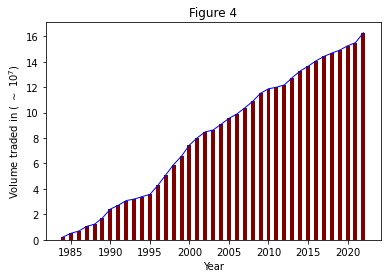

In [8]:
volume_stocks(1984,2022,0.5)

### In the bar chart above, we have demonstrated how the UNH annual volume (# of shares traded) has steadily increased by ~ 7,300 % over the past 39 years. This performance portrays the dependability and trust factor associated with this brand, which is underlined by the fact that volumes were not significantly impacted by the financial crisis of 2007-2008 and similar events!